In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '78dad28c-5d45-470b-8f79-3f9175701d16',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-17T17:53:26.618Z', 'error_code': 0, 'error_message': None, 'elapsed': 13, 'credit_count': 1, 'notice': None, 'total_count': 8738}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10745, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10745,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960090e+07,1.960090e+07,False,NaN,1,NaN,NaN,None,2024-01-17T17:52:00.000Z,42373.953266,2.155287e+10,-13.3443,0.233262,-1.614391,-8.198935,1.876181,15.638420,48.389659,8.305676e+11,49.6617,8.898530e+11,None,2024-01-17T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:53:25.774811
1,1027,Ethereum,ETH,ethereum,8261,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201797e+08,1.201797e+08,True,NaN,2,NaN,NaN,None,2024-01-17T17:52:00.000Z,2530.998089,1.101060e+10,7.5330,0.086427,-1.340938,4.023272,16.598677,28.695619,62.082155,3.041747e+11,18.1874,3.041747e+11,None,2024-01-17T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:53:25.774811
2,825,Tether USDt,USDT,tether,71910,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.518478e+10,9.860164e+10,True,NaN,3,NaN,NaN,None,2024-01-17T17:51:00.000Z,0.999126,4.029396e+10,-8.5626,0.012260,-0.055694,-0.131717,-0.049246,-0.135787,-0.131370,9.510154e+10,5.6878,9.851542e+10,None,2024-01-17T17:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-17 18:53:25.774811
3,1839,BNB,BNB,bnb,2017,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495493e+08,1.495493e+08,False,NaN,4,NaN,NaN,None,2024-01-17T17:51:00.000Z,310.468046,1.201964e+09,-2.6600,-0.235448,-2.062388,4.885849,30.130111,27.064993,47.476673,4.643027e+10,2.7762,4.643027e+10,None,2024-01-17T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:53:25.774811
4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.328108e+08,5.673964e+08,True,NaN,5,NaN,NaN,None,2024-01-17T17:52:00.000Z,99.009844,2.847682e+09,51.5447,0.023654,2.008787,3.156461,37.748828,69.946253,298.492296,4.285253e+10,2.5629,5.617783e+10,None,2024-01-17T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:53:25.774811
5,52,XRP,XRP,xrp,1206,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.426682e+10,9.998801e+10,False,NaN,6,NaN,NaN,None,2024-01-17T17:52:00.000Z,0.566516,8.788794e+08,-9.1092,-0.144119,-1.925279,-0.451834,-5.682882,-7.149862,16.529189,3.074300e+10,1.8401,5.665155e+10,None,2024-01-17T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:53:25.774811
6,3408,USDC,USDC,usd-coin,16235,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.547746e+10,2.547746e+10,False,NaN,7,NaN,NaN,None,2024-01-17T17:52:00.000Z,1.000041,5.247026e+09,0.8548,-0.009499,-0.004948,-0.049718,-0.017099,-0.005379,-0.017796,2.547851e+10,1.5250,2.547851e+10,None,2024-01-17T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-17 18:53:25.774811
7,2010,Cardano,ADA,cardano,1032,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.539515e+10,3.654270e+10,False,NaN,8,NaN,NaN,None,2024-01-17T17:51:00.000Z,0.527236,3.088395e+08,-5.3079,0.167047,-2.631608,3.888681,-8.008772,42.097250,116.269438,1.866160e+10,1.1161,2.372562e+10,None,2024-01-17T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:53:25.774811
8,5805,Avalanche,AVAX,avalanche,640,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',

        'X-CMC_PRO_API_KEY': '78dad28c-5d45-470b-8f79-3f9175701d16',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\mario\CSV de estudios\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\mario\CSV de estudios\CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\mario\CSV de estudios\CryptoAPI.csv', mode='a', header=False)
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video





In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute

print(df)

exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r'C:\Users\mario\CSV de estudios\CryptoAPI.csv')
df72                   

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10745,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19600900.00000,19600900.00000,False,NaN,1,NaN,NaN,None,2024-01-17T17:56:00.000Z,42373.81117,21542210255.79383,-13.40000,0.03814,-1.55894,-8.38673,2.10564,15.66239,48.37747,830564835268.82886,49.66160,889850034470.12000,None,2024-01-17T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:57:28.260428
1,1027,Ethereum,ETH,ethereum,8261,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120179738.31652,120179738.31652,True,NaN,2,NaN,NaN,None,2024-01-17T17:56:00.000Z,2529.84822,11008912601.05015,7.46600,-0.07063,-1.39504,3.89675,16.74762,28.67687,61.95042,304036497010.90979,18.17910,304036497010.90997,None,2024-01-17T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:57:28.260428
2,825,Tether USDt,USDT,tether,71910,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95184775480.94475,98601637401.43510,True,NaN,3,NaN,NaN,None,2024-01-17T17:55:00.000Z,0.99928,40304114496.54163,-8.52490,0.02859,-0.04054,-0.12323,-0.03761,-0.13353,-0.11746,95116104752.02605,5.68650,98530501589.23000,None,2024-01-17T17:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-17 18:57:28.260428
3,1839,BNB,BNB,bnb,2017,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149549272.09340,149549272.09340,False,NaN,4,NaN,NaN,None,2024-01-17T17:55:00.000Z,310.36412,1200372351.51705,-2.93260,-0.18220,-2.05899,4.75844,30.07781,26.98124,47.48680,46414727716.25370,2.77530,46414727716.25000,None,2024-01-17T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:57:28.260428
4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432810764.20144,567396359.95292,True,NaN,5,NaN,NaN,None,2024-01-17T17:56:00.000Z,98.95689,2853545045.59902,51.94610,0.11652,2.12746,2.90638,37.62379,69.72921,298.42131,42829608138.32184,2.56060,56147780429.47000,None,2024-01-17T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:57:28.260428
5,52,XRP,XRP,xrp,1206,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,None,2024-01-17T17:56:00.000Z,0.56654,877605245.11891,-9.34260,-0.11334,-1.93814,-0.51839,-5.70165,-7.19764,16.45099,30744563977.12706,1.83830,56654440247.06000,None,2024-01-17T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-17 18:57:28.260428
6,3408,USDC,USDC,usd-coin,16235,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25477455020.15854,25477455020.15854,False,NaN,7,NaN,NaN,None,2024-01-17T17:56:00.000Z,1.00019,5254613139.68374,1.04580,0.01508,0.01241,-0.03210,-0.00276,0.01132,0.00963,25482356657.62146,1.52370,25482356657.62000,None,2024-01-17T17:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-17 18:57:28.260428
7,2010,Cardano,ADA,cardano,1032,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35395152870.17300,36542697459.69000,False,NaN,8,NaN,NaN,None,2024-01-17T17:55:00.000Z,0.52737,308320524.81394,-5.55660,0.17635,-2.59131,3.69311,-8.16962,42.16103,116.42911,18666420655.13709,1.11600,23731750292.54000,None,2024-01-17T17:55:00.000Z,NaN

In [9]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03814,-1.55894,-8.38673,2.10564,15.66239,48.37747
Ethereum,-0.07063,-1.39504,3.89675,16.74762,28.67687,61.95042
Tether USDt,0.02859,-0.04054,-0.12323,-0.03761,-0.13353,-0.11746
BNB,-0.18220,-2.05899,4.75844,30.07781,26.98124,47.48680
Solana,0.11652,2.12746,2.90638,37.62379,69.72921,298.42131
XRP,-0.11334,-1.93814,-0.51839,-5.70165,-7.19764,16.45099
USDC,0.01508,0.01241,-0.03210,-0.00276,0.01132,0.00963
Cardano,0.17635,-2.59131,3.69311,-8.16962,42.16103,116.42911
Avalanche,0.41172,0.39404,1.06079,-10.06521,61.61345,298.54975


In [10]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.03814
             quote.USD.percent_change_24h    -1.55894
             quote.USD.percent_change_7d     -8.38673
             quote.USD.percent_change_30d     2.10564
             quote.USD.percent_change_60d    15.66239
             quote.USD.percent_change_90d    48.37747
Ethereum     quote.USD.percent_change_1h     -0.07063
             quote.USD.percent_change_24h    -1.39504
             quote.USD.percent_change_7d      3.89675
             quote.USD.percent_change_30d    16.74762
             quote.USD.percent_change_60d    28.67687
             quote.USD.percent_change_90d    61.95042
Tether USDt  quote.USD.percent_change_1h      0.02859
             quote.USD.percent_change_24h    -0.04054
             quote.USD.percent_change_7d     -0.12323
             quote.USD.percent_change_30d    -0.03761
             quote.USD.percent_change_60d    -0.13353
             quote.USD.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.03814
            quote.USD.percent_change_24h  -1.55894
            quote.USD.percent_change_7d   -8.38673
            quote.USD.percent_change_30d   2.10564
            quote.USD.percent_change_60d  15.66239
            quote.USD.percent_change_90d  48.37747
Ethereum    quote.USD.percent_change_1h   -0.07063
            quote.USD.percent_change_24h  -1.39504
            quote.USD.percent_change_7d    3.89675
            quote.USD.percent_change_30d  16.74762
            quote.USD.percent_change_60d  28.67687
            quote.USD.percent_change_90d  61.95042
Tether USDt quote.USD.percent_change_1h    0.02859
            quote.USD.percent_change_24h  -0.04054
            quote.USD.percent_change_7d   -0.12323
            quote.USD.percent_change_30d  -0.03761
            quote.USD.percent_change_60d  -0.13353
            quote.USD.percent_change_90d  -0.11746
BNB         quote.USD.percent_change_1h   -0.18220
            quote.USD.percent_change_24h  -2.05899
            quote.USD.percent_change_7d    4.75844
            quote.USD.percent_change_30d  30.07781
            quote.USD.percent_change_60d  26.98124
            quote.USD.percent_change_90d  47.48680
Solana      quote.USD.percent_change_1h    0.11652
            quote.USD.percent_change_24h   2.12746
            quote.USD.percent_change_7d    2.90638
            quote.USD.percent_change_30d  37.62379
            quote.USD.percent_change_60d  69.72921
            quote.USD.percent_change_90d 298.42131
XRP         quote.USD.percent_change_1h   -0.11334
            quote.USD.percent_change_24h  -1.93814
            quote.USD.percent_change_7d   -0.51839
            quote.USD.percent_change_30d  -5.70165
            quote.USD.percent_change_60d  -7.19764
            quote.USD.percent_change_90d  16.45099
USDC        quote.USD.percent_change_1h    0.01508
            quote.USD.percent_change_24h   0.01241
            quote.USD.percent_change_7d   -0.03210
            quote.USD.percent_change_30d  -0.00276
            quote.USD.percent_change_60d   0.01132
            quote.USD.percent_change_90d   0.00963
Cardano     quote.USD.percent_change_1h    0.17635
            quote.USD.percent_change_24h  -2.59131
            quote.USD.percent_change_7d    3.69311
            quote.USD.percent_change_30d  -8.16962
            quote.USD.percent_change_60d  42.16103
            quote.USD.percent_change_90d 116.42911
Avalanche   quote.USD.percent_change_1h    0.41172
            quote.USD.percent_change_24h   0.39404
            quote.USD.percent_change_7d    1.06079
            quote.USD.percent_change_30d -10.06521
            quote.USD.percent_change_60d  61.61345
            quote.USD.percent_change_90d 298.54975
Dogecoin    quote.USD.percent_change_1h   -0.01292
            quote.USD.percent_change_24h  -1.39826
            quote.USD.percent_change_7d    2.06973
            quote.USD.percent_change_30d -11.14488
            quote.USD.percent_change_60d  -0.14804
            quote.USD.percent_change_90d  37.07421
TRON        quote.USD.percent_change_1h   -0.02390
            quote.USD.percent_change_24h  -0.36520
            quote.USD.percent_change_7d    3.24924
            quote.USD.percent_change_30d   7.98987
            quote.USD.percent_change_60d   4.93968
            quote.USD.percent_change_90d  20.30114
Polkadot    quote.USD.percent_change_1h   -0.21678
            quote.USD.percent_change_24h  -1.79347
            quote.USD.percent_change_7d    2.79343
            quote.USD.percent_change_30d   9.60792
            quote.USD.percent_change_60d  39.28455
            quote.USD.percent_change_90d 102.00423
Chainlink   quote.USD.percent_change_1h   -0.91920
            quote.USD.percent_change_24h   4.63940
            quote.USD.percent_change_7d   11.36537
            quote.USD.percent_change_30d  10.61546
            quote.USD.percent_change_60d  15.36876
            quo

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03814
1,Bitcoin,quote.USD.percent_change_24h,-1.55894
2,Bitcoin,quote.USD.percent_change_7d,-8.38673
3,Bitcoin,quote.USD.percent_change_30d,2.10564
4,Bitcoin,quote.USD.percent_change_60d,15.66239
5,Bitcoin,quote.USD.percent_change_90d,48.37747
6,Ethereum,quote.USD.percent_change_1h,-0.07063
7,Ethereum,quote.USD.percent_change_24h,-1.39504
8,Ethereum,quote.USD.percent_change_7d,3.89675
9,Ethereum,quote.USD.percent_change_30d,16.74762


In [16]:
# change column name 
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03814
1,Bitcoin,quote.USD.percent_change_24h,-1.55894
2,Bitcoin,quote.USD.percent_change_7d,-8.38673
3,Bitcoin,quote.USD.percent_change_30d,2.10564
4,Bitcoin,quote.USD.percent_change_60d,15.66239
5,Bitcoin,quote.USD.percent_change_90d,48.37747
6,Ethereum,quote.USD.percent_change_1h,-0.07063
7,Ethereum,quote.USD.percent_change_24h,-1.39504
8,Ethereum,quote.USD.percent_change_7d,3.89675
9,Ethereum,quote.USD.percent_change_30d,16.74762


In [22]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.03814
1,Bitcoin,24h,-1.55894
2,Bitcoin,7d,-8.38673
3,Bitcoin,30d,2.10564
4,Bitcoin,60d,15.66239
5,Bitcoin,90d,48.37747
6,Ethereum,1h,-0.07063
7,Ethereum,24h,-1.39504
8,Ethereum,7d,3.89675
9,Ethereum,30d,16.74762


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\mario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


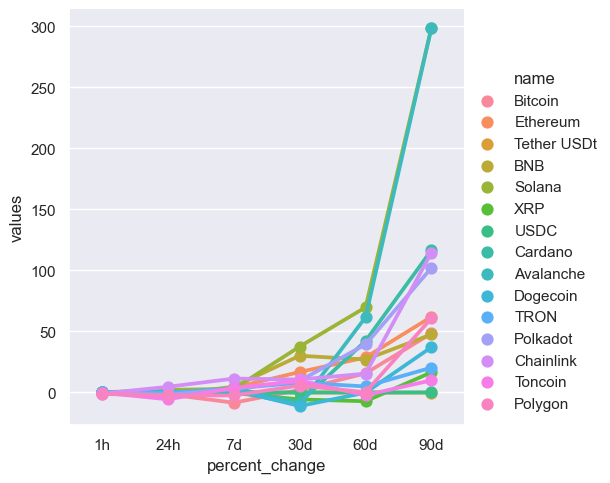

In [23]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [25]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,42373.81117,2024-01-17 18:57:28.260428


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

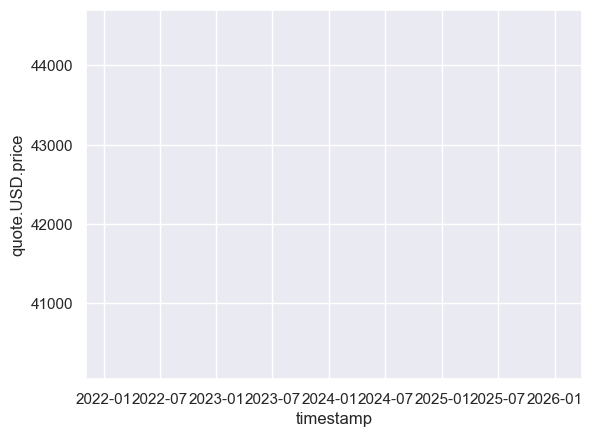

In [26]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)